## Foundations: Clean Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read The Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [20]:
titanic = pd.read_csv('titanic.csv')
titanic.head()
df = titanic
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Print the total len of the dataframe and the names of the columns

In [10]:
print('len(df):', len(df))
print('len(df.columns):', len(df.columns))

len(df): 891
len(df.columns): 12


#### Print the total mean of Survived

In [11]:
print("Total probability of survival for all passengers -->  {:.4f}".format(df.Survived.mean()))

Total probability of survival for all passengers -->  0.3838


Each row represents one person. The columns describe different attributes about the person including whether they 
survived `(S)`, their age `(A)`, their passenger-class `(C)`, their sex `(G)` and the fare they paid `(X)`.

#### [Quetion] Calculate the conditional probability that a person survives given their sex and passenger-class:
P(S= true | G=female,C=1)

P(S= true | G=female,C=2)

P(S= true | G=female,C=3)

P(S= true | G=male,C=1)

P(S= true | G=male,C=2)

P(S= true | G=male,C=3)

[Guiding]
Calculating the probability of a relevant survived group to need first to the amount of survives divided by the total amount of the group. 
For example: `len(df[(df["Survived"]==1) & (df["Sex"]=="female")])` will provide the number of female passenger that are survived. So you need to add a condition of `class=1` to find the total number of female passenger belong to first class that are survived.

Use the same principle to calculate the total numer of female passeger belong to first class.
Then calculate all of the following.

In [3]:
print('the len of female passenger that are survived: ', len(titanic[(df["Survived"]==1) & (df["Sex"]=="female")]))

the len of female passenger that are survived:  233


In [5]:
# How likely is survival??
print("Survival probability for female in first class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="female") & (df["Pclass"]==1)].index) / len(df[(df["Sex"]=="female") & (df["Pclass"]==1)].index)))
print("Survival probability for female in second class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="female") & (df["Pclass"]==2)].index) / len(df[(df["Sex"]=="female") & (df["Pclass"]==2)].index)))
print("Survival probability for female in third class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="female") & (df["Pclass"]==3)].index) / len(df[(df["Sex"]=="female") & (df["Pclass"]==3)].index)))
print("")
print("Survival probability for male in first class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="male") & (df["Pclass"]==1)].index) / len(df[(df["Sex"]=="male") & (df["Pclass"]==1)].index)))
print("Survival probability for male in second class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="male") & (df["Pclass"]==2)].index) / len(df[(df["Sex"]=="male") & (df["Pclass"]==2)].index)))
print("Survival probability for male in third class -->  {:.4f}".format(len(df[(df["Survived"]==1) & (df["Sex"]=="male") & (df["Pclass"]==3)].index) / len(df[(df["Sex"]=="male") & (df["Pclass"]==3)].index)))

Survival probability for female in first class -->  0.9681
Survival probability for female in second class -->  0.9211
Survival probability for female in third class -->  0.5000

Survival probability for male in first class -->  0.3689
Survival probability for male in second class -->  0.1574
Survival probability for male in third class -->  0.1354


### Fare Avrage
[`Quetion`] calculate the total fare mean and the fare mean of each class. Use column `Pclass` [1,2,3] to select each class.
The mean is calculate by the method `.mean()`

In [6]:
print("Average fare of all passengers -->   {:.4f}".format(df.Fare.mean()))
# How much you have to pay for the different classes in average?? (price unit is £/pounds)
print("First class mean cost -->  {:.4f}".format(df[df["Pclass"]==1].Fare.mean()))
print("Second class mean cost -->  {:.4f}".format(df[df["Pclass"]==2].Fare.mean()))
print("Third class mean cost -->  {:.4f}".format(df[df["Pclass"]==3].Fare.mean()))

Average fare of all passengers -->   32.2042
First class mean cost -->  84.1547
Second class mean cost -->  20.6622
Third class mean cost -->  13.6756


### Age 
[`question`] find the mean, min and max of Age column

In [7]:
# average age of all passengers
print("Average age of all passengers -->  {0:.1f}".format(df.Age.mean()))
print("Age of oldest passenger -->  {:.1f}".format(df.Age.max()))
print("Age of youngest passenger -->  {:.1f}".format(df.Age.min()))

Average age of all passengers -->  29.7
Age of oldest passenger -->  80.0
Age of youngest passenger -->  0.4


### Plot Data
Use the method `sns.countplot` to plot a bar of relevent column. 
Plot the colum of `Survived` and title it with `plt.title` method

Text(0.5, 1.0, 'No. of survivors and dead')

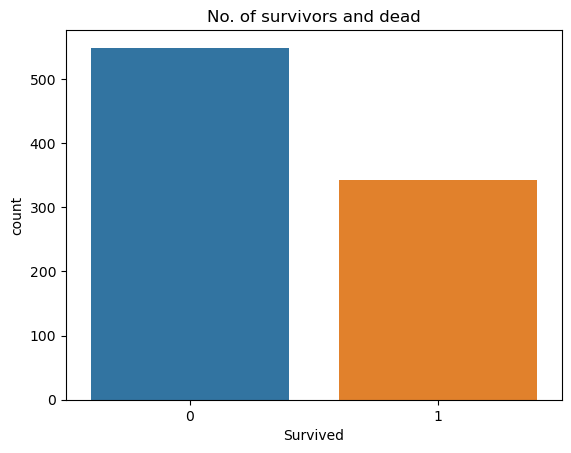

In [11]:
sns.countplot(x='Survived', data=df)
plt.title("No. of survivors and dead")

Text(0.5, 1.0, 'No. of people survived and died separated into women and men')

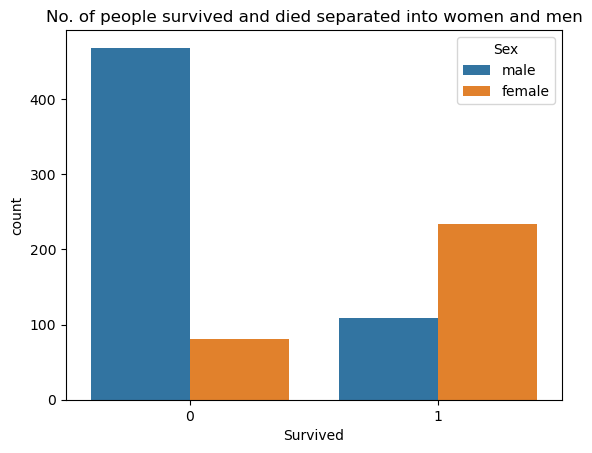

In [12]:
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("No. of people survived and died separated into women and men")

Text(0.5, 1.0, 'No. of people survived from different classes')

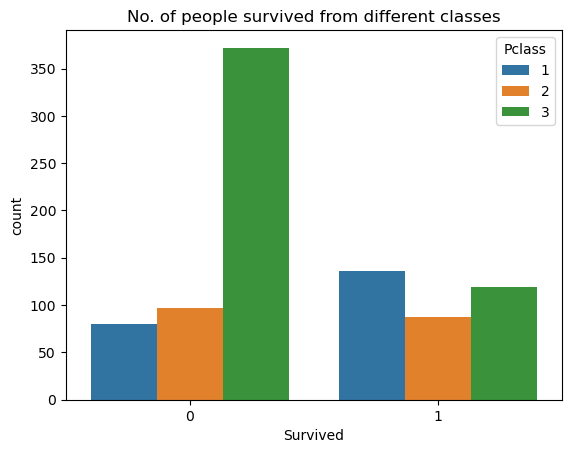

In [13]:
sns.countplot(x="Survived", hue="Pclass", data=df)
plt.title("No. of people survived from different classes")

Use the method `sns.distplot` to display the the fare distribution and the costs from the different classes


/tmp/ipykernel_8985/3402112601.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

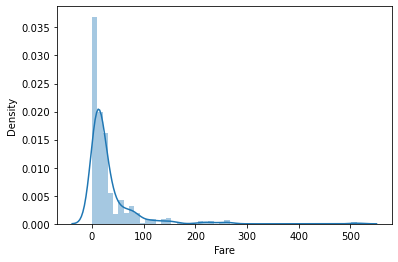

In [20]:
sns.distplot(df.Fare)

Use distplot to display number of sibling and spouses on board for each passenger
- use `sns.distplot`
- use the column `df['SibSp]` with parameter `kde=False`

/tmp/ipykernel_8985/185859527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SibSp"], kde=False)


Text(0.5, 1.0, 'Number of siblings and spouses on board of each passenger')

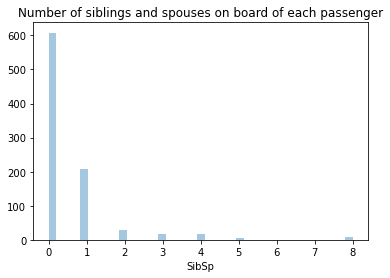

In [21]:
sns.distplot(df["SibSp"], kde=False)
plt.title("Number of siblings and spouses on board of each passenger")

Use the method `sns.distplot` to display the distribution of the ages of the passengers.
Add title `Ages of passengers` by using plt.title

/tmp/ipykernel_8985/535253463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


Text(0.5, 1.0, 'Ages of passengers')

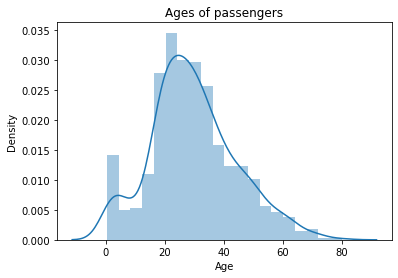

In [22]:
sns.distplot(df.Age)
plt.title("Ages of passengers")

# Data Preperation

We have three types of columns. One is columns with numerical values like `Fare`.<br>
Second types are `categorial columns`. Those columns include categorial values like 'Sex', 'Cabin', 'Embarked'.<br>
The Third type is `output columns`, in our case it is `Survived`<br>

We need to convert none number values (like female, male in case of a 'Sex' column) to a numerical value.<br>
Pandas support datatype call 'category'. It enable to automatiicly convert it into numbers. 

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Cleaning Nulls and Nans

First lets check what columns has nulls and nans.
Use the method `isnull` and `sum` of the dataframe to check what columns has nulls

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the column `Age` use the method `df.fillna` to fill all nulls values with the mean of `Age`

In [21]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


We will combine the `SibSp` and `Parch` into one column called `Family_cnt`.
Create new column in the dataframe called `Family_cnt` in the values of `SibSp` and `Parch`

In [22]:
df['Family_cnt'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Drop unnnecessary variables
Use the `df.drop` with `inplace=True` to drop the colmns 'PassengerId', 'SibSp', 'Parch'.

In [23]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,NaN,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C148,C,0


In [25]:
input_cols = [title for title in df.columns[1:] if title != 'Name']
categorical_cols = ["Sex"]
output_cols = ["Survived"]

print('input_cols:', input_cols)
print('categorical_cols:', categorical_cols)

input_cols: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
categorical_cols: ['Sex']


In [26]:
def dataframe_to_arrays(dataframe, normalize=False, labeled=True, cols=input_cols):
  # Make a copy of the original dataframe
  dataframe1 = dataframe.copy(deep=True)
  # Convert categorical columns to numbers
  for col in categorical_cols:
      dataframe1[col] = dataframe1[col].astype('category').cat.codes
  
  # normalize the input data with min max normalization
  if normalize:
      for col in cols:
          dataframe1[col] = (dataframe1[col] - dataframe1[col].min()) / (dataframe1[col].max() - dataframe1[col].min())
  # Extract input & outputs as numpy arrays
  inputs_array = dataframe1[cols].to_numpy()
  if labeled:
      targets_array = dataframe1[output_cols].to_numpy().reshape(-1,1)
      return inputs_array, targets_array
  else:
      return inputs_array

In [30]:
dataframe1 = df.copy(deep=True)
for col in categorical_cols:
  dataframe1[col] = dataframe1[col].astype('category').cat.codes

for col in input_cols:
  dataframe1[col] = (dataframe1[col] - dataframe1[col].min()) / (dataframe1[col].max() - dataframe1[col].min())  

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [27]:
input_arr, target_arr = dataframe_to_arrays(df, normalize=True)
input_arr, target_arr

TypeError: unsupported operand type(s) for -: 'str' and 'str'